<a href="https://colab.research.google.com/github/erickm13/Tareas-Laboratorios-SP1/blob/main/Laboratorios/SP1_Laboratory_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Erick Eleazar Mejia Moscoso
Carnet: 20006104

## Preparations

In [131]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

# Regression


## 1) Dataset Preparations

In [132]:
'''
The dataset you are going to use is the following:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG
'''
!wget https://archive.ics.uci.edu/static/public/9/auto+mpg.zip
# Retrieve the dataset
# /* YOUR CODE HERE */

--2025-02-07 02:17:27--  https://archive.ics.uci.edu/static/public/9/auto+mpg.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘auto+mpg.zip’

auto+mpg.zip            [ <=>                ]  14.52K  --.-KB/s    in 0.03s   

2025-02-07 02:17:28 (498 KB/s) - ‘auto+mpg.zip’ saved [14873]



In [133]:
!unzip /content/auto+mpg.zip

Archive:  /content/auto+mpg.zip
  inflating: Index                   
  inflating: auto-mpg.data           
  inflating: auto-mpg.data-original  
  inflating: auto-mpg.names          


In [134]:
# Loading Dataset and have a glimpse about it
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model_Year', 'Origin']

# /* YOUR CODE HERE */
# Hint: Make sure to check out the files first! And pay attention how data is separated
raw_dataset = pd.read_csv("auto-mpg.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
# Brief Statistical Summary of the dataset
raw_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [135]:
# Lets check columns
raw_dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_Year', 'Origin'],
      dtype='object')

In [136]:
# Summary of the dataset
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [137]:
# Returns a form of (# rows, # columns)
raw_dataset.shape

(398, 8)

In [138]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_Year      0
Origin          0
dtype: int64


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


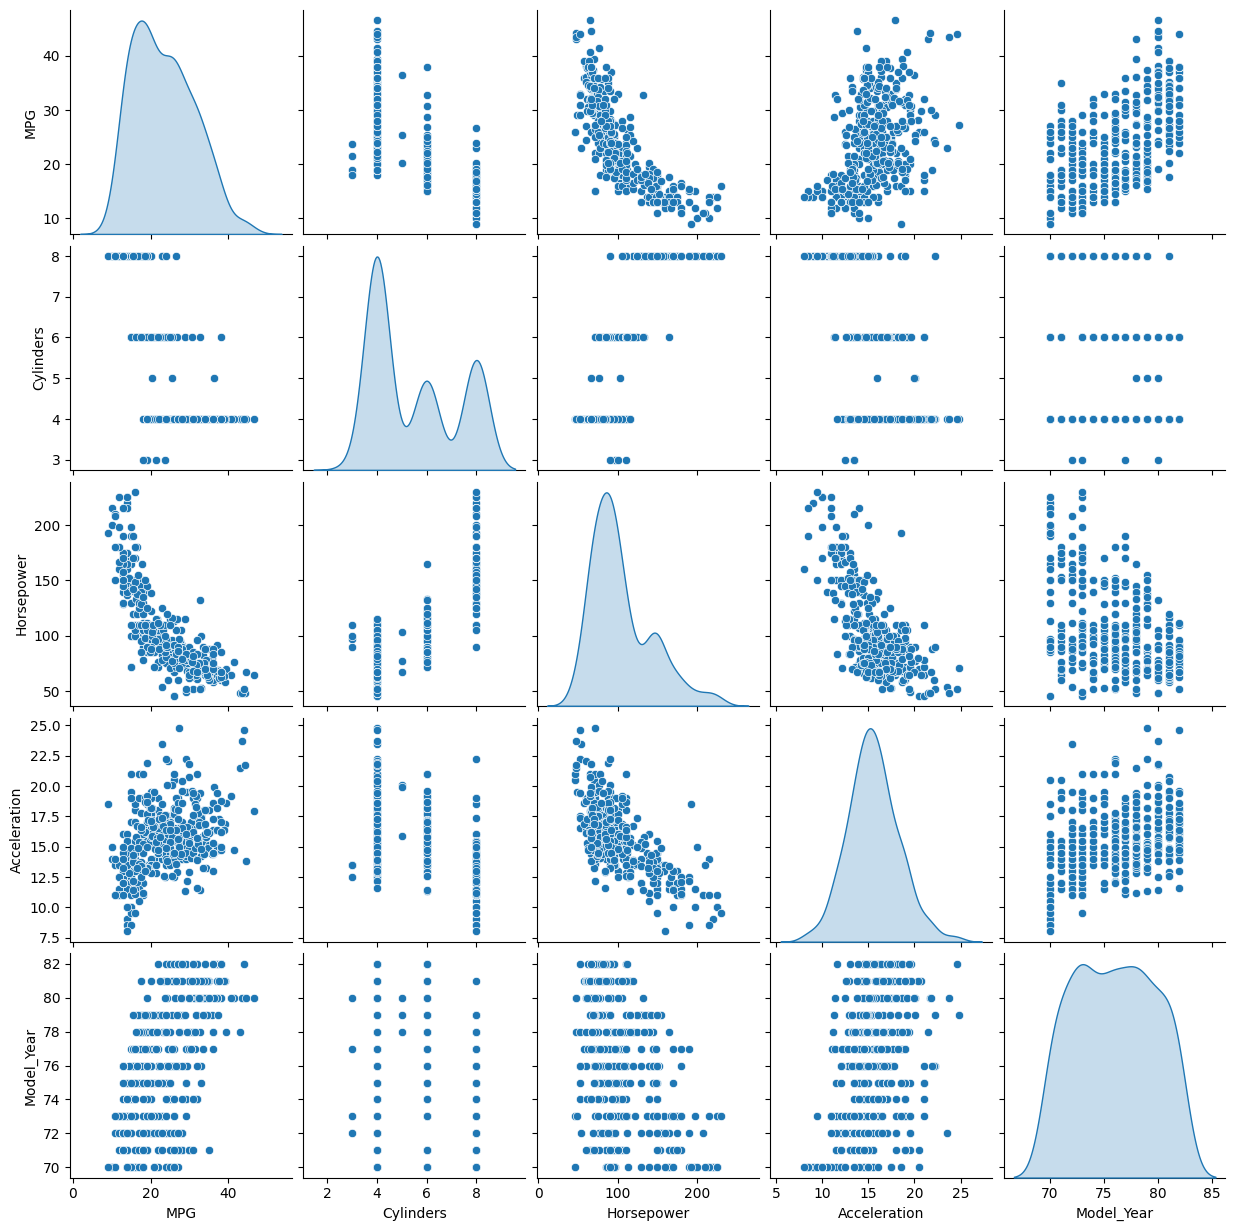

In [139]:
# Lets visualize the data
# /* YOUR CODE HERE*/
sns.pairplot(new_dataset[['MPG','Cylinders','Horsepower', 'Acceleration', 'Model_Year']], diag_kind="kde")
# Hint: Choose 5 NUMERICAL variables

## 2) NN for a simple Regression

In [141]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables

# /* REPLACE 'None' WITH CODE YOUR CODE */
# Hint: Make sure you select only numerical variables.
# Feel free to choose the number of independent variables
# you want and the dependent variable is MPG
independent_variables = ['Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model_Year', 'Origin']
dependent_variables = ['MPG']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [165]:
# Build your model!
# /* YOUR CODE HERE */
# Lets build a simple model. NOTE: this is the construction of the architecture of the model!
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables),)),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'), #Colocamos 7 layers ya que tenemos 7 variables dependientes.
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),

  # Last layer of the model and its activation function decide if it is a regression or classification problem!
  tf.keras.layers.Dense(units=len(dependent_variables), activation='linear'), #la ultima capa utilizamos la funcion de activacion linear, porque el dataset el manipularse con relu genera underfittring
  ])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
# Now compile the model!
# /* YOUR CODE HERE */

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [175]:
# Now lets train the model!
# Hint: Feel free to change a few parameters
model.fit(train_set,
          train_target,
          epochs=100, # utilizamos 100 para el aprandisaje de la red neuronal porque, utlizar 15 hacia que la red no aprendiera y no recorriera toda la data (muy poco tiempo)
          batch_size = 36, # la verdad no porque 36 pero jalo y si jalo no hay que tocarlo.
          validation_split=0.2
        )

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 22.0953 - root_mean_squared_error: 4.6672 - val_loss: 20.4960 - val_root_mean_squared_error: 4.5273
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 14.7057 - root_mean_squared_error: 3.8214 - val_loss: 8.0577 - val_root_mean_squared_error: 2.8386
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.7729 - root_mean_squared_error: 3.2770 - val_loss: 7.7795 - val_root_mean_squared_error: 2.7892
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.6795 - root_mean_squared_error: 3.9532 - val_loss: 8.1879 - val_root_mean_squared_error: 2.8614
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.0161 - root_mean_squared_error: 3.3126 - val_loss: 7.9111 - val_root_mean_squared_error: 2.8127
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.1955 - root_mean_squared_error: 3.0253 - val_loss: 9.1354 - val_root_mean_squared_error: 3.0225
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 

In [176]:
# Evaluate your model
model.evaluate(x=test_set, y=test_target, batch_size=128) #tuvimos un accurancy de 8 por lo que es un resultado muy bueno para el dataset que estamos utilizando dano por concluido el ejercicio.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.6807 - root_mean_squared_error: 2.9463


[8.680749893188477, 2.9463112354278564]

# Classification

## 1) Dataset Preparations

In [ ]:
'''
The dataset you are going to use is the following:
https://archive.ics.uci.edu/ml/datasets/Ecoli
'''

# Retrieve the dataset
# /* YOUR CODE HERE */

In [ ]:
# Loading Dataset and have a glimpse about it
column_names = ['name','MCG','GVH','LIP', 'CHG', 'AAC', 'AML1', 'ALM2', 'class']

# /* YOUR CODE HERE */
# Hint: Make sure to check out the files first! And pay attention how data is separated

# Brief Statistical Summary of the dataset
raw_dataset.describe()

In [ ]:
# Lets check columns
raw_dataset.columns

In [ ]:
# Summary of the dataset
raw_dataset.head()

In [ ]:
# Returns a form of (# rows, # columns)
raw_dataset.shape

In [ ]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
# df.dropna()
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

In [ ]:
# Lets visualize the data

# /* YOUR CODE HERE*/
# Hint: Choose 5 NUMERICAL variables

In [ ]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables

# /* REPLACE 'None' WITH CODE YOUR CODE */
# Hint: Make sure you select only numerical variables.
# Feel free to choose the number you want and the dependent variables is MPG
independent_variables = None
dependent_variables = None

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [ ]:
train_target, test_target

In [ ]:
# NNs can't understand strings, we have to ENCODE them! (more next class)
train_target = pd.factorize(train_target['class'])[0]
test_target = pd.factorize(test_target['class'])[0]

## 2) NN for Classification

In [ ]:
# Build your model!
# /* YOUR CODE HERE */
# Hint: Is this a binary or multiclassification problem?

# Now compile the model!
# /* YOUR CODE HERE */

In [ ]:
# Evaluate your model
model.evaluate(x=test_set, y=test_target, batch_size=128)

In [ ]:
# Function that plots confusion matrix
def plot_confusion_matrix(labels, predictions):
  figure = plt.figure(figsize=(4, 4))
  sns.heatmap(confusion_matrix(labels=labels, predictions=predictions), annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Confusion Matrix
predictions = list(map(lambda x: np.argmax(x), model.predict(test_set)))

plot_confusion_matrix(labels=test_target, predictions=predictions)

# Conclusiones

After you are done with both previous models, make 3 different models for the regression problem and 3 for the classification problem.

Annotate the results in a Text Cell below this one (only the metrics shown in the evaluation phase) and then write a conclusion which model was the best for each problem.

# READ ME

When you are finished with your laboratory, remember to share it. Make the URL public for Galileo.edu domain or for everyone.
Also, remember to hit Ctrl+S to save your progress.